In [ ]:
##1. Read the column description and ensure you understand each attribute well


####2. Study the data distribution in each attribute, share your findings. (10 points)


#####3. Get the target column distribution. 


#####4. Split the data into training and test set in the ratio of 70:30 respectively


#######5. Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a
###-liability customer buying personal loans (30 points)


##########6. Print the confusion matrix for all the above models (10 points)


##############7. Give your reasoning on which is the best model in this case and why it performs better? (10 points)

 

In [35]:
import pandas as pd 
import numpy as np 

df=pd.read_csv("Bank_Personal_Loan_Modelling-1.csv")
df.info()
df.describe().transpose()
df.head(15)
df.dtypes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [36]:
###df.groupby('Experience').count()
###df.groupby('Income').count()

import matplotlib.pyplot as plt
df.head(10)
for col in df.columns: 
    print(col) 

names = ['ID','Age','Experience','Income','ZIP Code','Family','CCAvg','Education','Mortgage','Personal Loan','Securities Account','CD Account','Online','CreditCard']
####df = pd.read_csv('Bank_Personal_Loan_Modelling-1.csv', names=names)


ID
Age
Experience
Income
ZIP Code
Family
CCAvg
Education
Mortgage
Personal Loan
Securities Account
CD Account
Online
CreditCard


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B761A4C438>,
      dtype=object)

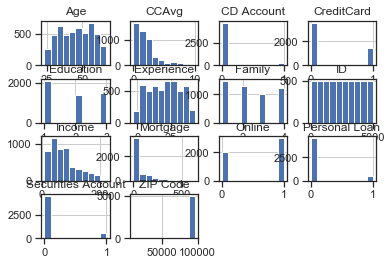

In [38]:
df.hist()

In [ ]:
df1=pd.read_excel("TheraBank_Column_Description.xlsx",skiprows=4)
df1.drop(1,axis=0,inplace=True)
df1.replace(np.NaN,'-')


In [33]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


# Obervation of Each column 

# Information on the features or attributes
The attributes can be divided accordingly :

The variable ID does not add any interesting information. There is no association between a person's customer ID and loan, also it does not provide any general conclusion for future potential loan customers. We can neglect this information for our model prediction.


The binary category have five variables as below:

Personal Loan - Did this customer accept the personal loan offered in the last campaign? This is our target variable
Securities Account - Does the customer have a securities account with the bank?
CD Account - Does the customer have a certificate of deposit (CD) account with the bank?
Online - Does the customer use internet banking facilities?
Credit Card - Does the customer use a credit card issued by UniversalBank?

Interval variables are as below:

Age - Age of the customer
Experience - Years of experience
Income - Annual income in dollars
CCAvg - Average credit card spending
Mortage - Value of House Mortgage
Ordinal Categorical Variables are:

Family - Family size of the customer
Education - education level of the customer

The nominal variable is :

ID
Zip Code

# Observation 

### Age feature is normally distributed with majority of customers falling between 30 years and 60 years of age. We can confirm this by looking at the describe statement above, which shows mean is almost equal to median 
###Experience is normally distributed with more customer having experience starting from 8 years. Here the mean is equal to median. There are negative values in the Experience. This could be a data input error as in general it is not possible to measure negative years of experience. We can delete these values, because we have 3 or 4 records from the sample.
###Income is positively skewed. Majority of the customers have income between 45K and 55K. We can confirm this by saying the mean is greater than the median
##CCAvg is also a positively skewed variable and average spending is between 0K to 10K and majority spends less than 2.5K
##Mortgage 70% of the individuals have a mortgage of less than 40K. However the max value is 635K
##Age and experience share the highest correleation so the age and experience can be the two crucial factors to define whether the loan to be given or not
###The variables family and education are ordinal variables. The distribution of families is evenly distributes

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns
%matplotlib inline
sns.set(style="ticks")

from scipy.stats import zscore
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection


In [11]:
### Inflence of Education and income on personal loan 


Observation : customers whose education level is 1 is having more income. However customers who has taken the personal loan have the same income levels


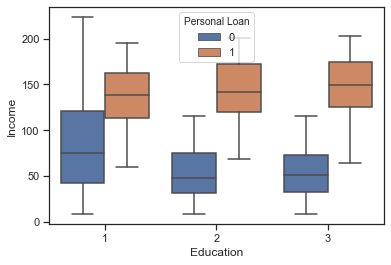

In [14]:
sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=df)
print("Observation : customers whose education level is 1 is having more income. However customers who has taken the personal loan have the same income levels")

Observation : Majority of customers who does not have loan have securities account


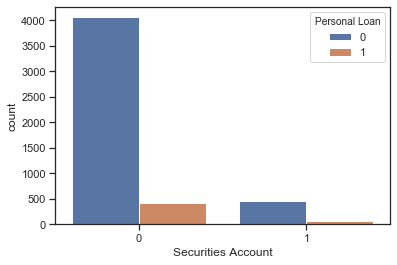

In [15]:
sns.countplot(x="Securities Account", data=df,hue="Personal Loan")
print("Observation : Majority of customers who does not have loan have securities account")

Observation: Family size does not have any impact in personal loan. But it seems families with size of 3 are more likely to take loan. When considering future campaign this might be good association.


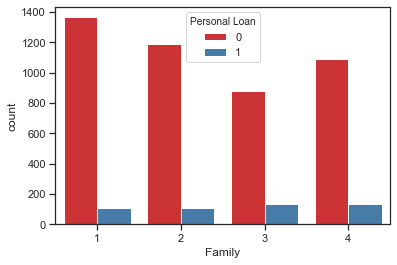

In [16]:
sns.countplot(x='Family',data=df,hue='Personal Loan',palette='Set1')
print("Observation: Family size does not have any impact in personal loan. But it seems families with size of 3 are more likely to take loan. When considering future campaign this might be good association.")

Observation: Customers who does not have CD account , does not have loan as well. This seems to be majority. But almost all customers who has CD account has loan as well


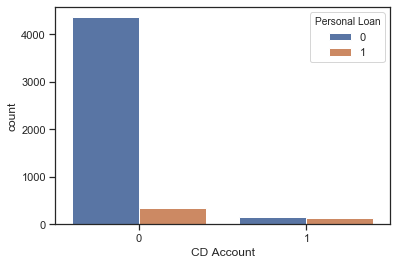

In [17]:
sns.countplot(x='CD Account',data=df,hue='Personal Loan')
print("Observation: Customers who does not have CD account , does not have loan as well. This seems to be majority. But almost all customers who has CD account has loan as well")

In [18]:
print(df.corr())
print('\n')
print("Observation :Age and experience share the highest correleation so the age and experience can be the two crucial factors to define whether the loan to be given or not")

                          ID       Age  Experience    Income  ZIP Code  \
ID                  1.000000 -0.008473   -0.008326 -0.017695  0.013432   
Age                -0.008473  1.000000    0.994215 -0.055269 -0.029216   
Experience         -0.008326  0.994215    1.000000 -0.046574 -0.028626   
Income             -0.017695 -0.055269   -0.046574  1.000000 -0.016410   
ZIP Code            0.013432 -0.029216   -0.028626 -0.016410  1.000000   
Family             -0.016797 -0.046418   -0.052563 -0.157501  0.011778   
CCAvg              -0.024675 -0.052012   -0.050077  0.645984 -0.004061   
Education           0.021463  0.041334    0.013152 -0.187524 -0.017377   
Mortgage           -0.013920 -0.012539   -0.010582  0.206806  0.007383   
Personal Loan      -0.024801 -0.007726   -0.007413  0.502462  0.000107   
Securities Account -0.016972 -0.000436   -0.001232 -0.002616  0.004704   
CD Account         -0.006909  0.008043    0.010353  0.169738  0.019972   
Online             -0.002528  0.013702

In [19]:
### The Distribution of Target column.
df['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [20]:
df[df['Experience'] < 0]['Experience'].value_counts()

-1    33
-2    15
-3     4
Name: Experience, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B7618DC048>]],
      dtype=object)

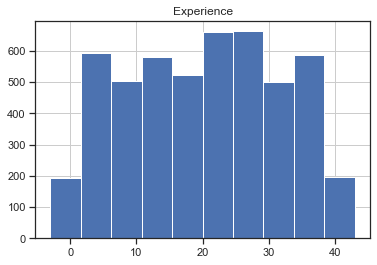

In [21]:
df.hist('Experience')


In [22]:
### Data to be segregated to 70 and 30 percent and model implementation 

In [44]:
# Creating  the training and test data set in the ratio of 70:30 respectively. Can be any other ratio...

X = df.drop(['Experience' ,'ID'] , axis = 1).drop(labels= "Personal Loan" , axis = 1)
 
    
y = df[['Personal Loan']]

test_size = 0.30 
seed = 7  
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y, test_size=test_size, random_state=seed)
X_train

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
717,59,94,93940,3,0.50,1,0,0,0,0,1
2496,63,32,93117,3,0.70,2,141,0,0,0,0
2469,43,89,92780,1,0.10,2,307,0,0,0,1
1375,50,179,92612,1,2.90,3,0,0,0,0,1
2742,39,89,95762,2,0.40,1,0,0,0,1,0
359,32,32,93106,1,1.90,3,0,0,0,1,0
4532,48,133,90073,2,3.10,2,0,0,0,1,0
887,41,118,94720,2,3.30,1,0,0,0,1,0
4727,41,58,92009,4,2.67,1,0,0,0,1,1
841,57,121,94542,1,4.30,1,0,1,0,0,0


In [45]:
from sklearn import model_selection
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

# NAVIES BAYES

In [46]:
model = GaussianNB()
model.fit(X_train, y_train)

C:\Users\mohan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [47]:
# make predictions
expected = y_test
predicted = model.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93      1362
           1       0.40      0.59      0.48       138

    accuracy                           0.88      1500
   macro avg       0.68      0.75      0.70      1500
weighted avg       0.91      0.88      0.89      1500

[[1238  124]
 [  56   82]]


In [48]:
##Make expectations
expected = y_train
predicted = model.predict(X_train)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       0.95      0.92      0.94      3158
           1       0.43      0.56      0.49       342

    accuracy                           0.89      3500
   macro avg       0.69      0.74      0.71      3500
weighted avg       0.90      0.89      0.89      3500

[[2905  253]
 [ 149  193]]


# LogisticRegression

In [49]:
logreg=LogisticRegression(penalty="none",solver="lbfgs")
logreg.fit(X_train,y_train)

C:\Users\mohan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
y_pred=logreg.predict(X_test)
print(logreg.score(X_test,y_test))
print(logreg.score(X_train,y_train))

from sklearn.metrics import f1_score,confusion_matrix

confusion_matrix(y_test,y_pred)

0.9153333333333333
0.9042857142857142


array([[1334,   28],
       [  99,   39]], dtype=int64)

In [51]:
from sklearn.metrics import f1_score
f1_score(y_pred,y_test,average ="weighted") 

0.9289197492618934

# KNN 

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=1)
knn=KNeighborsClassifier(n_neighbors=5)
sc=StandardScaler()
sc.fit(X_train)
scaledX_train = sc.transform(X_train)
scaledX_test = sc.transform(X_test)
knn.fit(scaledX_train,y_train)
print("What is the Testing Accuracy")
print(knn.score(scaledX_test,y_test))
print("What is the Training Accuracy")
print(knn.score(scaledX_train,y_train))
predicted = knn.predict(scaledX_test)
print(confusion_matrix(y_test,predicted))
print(confusion_matrix(y_test,predicted)[1,0])

C:\Users\mohan\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


What is the Testing Accuracy
0.9513333333333334
What is the Training Accuracy
0.9722857142857143
[[1343    8]
 [  65   84]]
65


In [ ]:
from matplotlib import pyplot as plt
import numpy as np

neighbors = np.arange(1, 60)
train_accuracy_plot = np.empty(len(neighbors))
test_accuracy_plot = np.empty(len(neighbors))
# Loop over different values of k
for i, k in enumerate(neighbors):
    train = []
    test = []
    for j in range(20):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=j)
        sc=StandardScaler()
        scaledX_train = sc.fit_transform(X_train)
        scaledX_test = sc.transform(X_test)
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(scaledX_train,y_train)
        train.append(knn.score(scaledX_train,y_train))
        test.append(knn.score(scaledX_test,y_test))
    #Compute accuracy on the training set
    train_accuracy_plot[i] = np.mean(train)
    #Compute accuracy on the testing set
    test_accuracy_plot[i] = np.mean(test)
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy_plot, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy_plot, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

C:\Users\mohan\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\mohan\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\mohan\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\mohan\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\mohan\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column

C:\Users\mohan\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\mohan\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\mohan\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\mohan\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\mohan\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column

C:\Users\mohan\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\mohan\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\mohan\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\mohan\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\mohan\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column

C:\Users\mohan\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\mohan\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\mohan\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\mohan\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\mohan\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column

C:\Users\mohan\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\mohan\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\mohan\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\mohan\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\mohan\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column

C:\Users\mohan\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\mohan\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\mohan\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\mohan\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\mohan\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column

C:\Users\mohan\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\mohan\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\mohan\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\mohan\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\mohan\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column

C:\Users\mohan\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\mohan\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\mohan\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\mohan\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\mohan\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column

# Confusion Matrix of KNN, Logistic Regression and KNN .

### Reply : The Matrices are printed with in the models itself .

# Give your reasoning on which is the best model in this case and why it performs better?

In [8]:
print("The model that better fits to decide a solution to the above mentioned problem is KNN .As the accuracy of the Navie Bayes and the logistic regression is comparitively less when compared to the others.On an overall if we compare the real time scenario , from my observation is all the models has the best accuracy and if we consider the demirits ok KNN where KNN is totally a costly and a lazy algorithm ,we can compare the cost of each of all these algorithms and we can finalise the best of it .But as per the current scenario as it is not being implemented in a live scenario KNN is the better Fit and the right solution to the problem")

The model that better fits to decide a solution to the above mentioned problem is KNN .As the accuracy of the Navie Bayes and the logistic regression is comparitively less when compared to the others.On an overall if we compare the real time scenario , from my observation is all the models has the best accuracy and if we consider the demirits ok KNN where KNN is totally a costly and a lazy algorithm ,we can compare the cost of each of all these algorithms and we can finalise the best of it .But as per the current scenario as it is not being implemented in a live scenario KNN is the better Fit and the right solution to the problem
